In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
# obtain the exchage rate data from AKShare, which is an elegant and simple financial data interface library for Python
# using the API below, to access history trading data from the following website
# http://biz.finance.sina.com.cn/forex/forex.php?startdate=2012-01-01&enddate=2021-06-14&money_code=EUR&type=0
exchange_rate_orign_df = ak.currency_boc_sina(symbol="加拿大元", start_date="20190101", end_date="20231015")

In [3]:
exchange_rate_orign_df

,日期,中行汇买价,中行钞买价,中行钞卖价/汇卖价,央行中间价
0,2019-01-01,502.21,486.35,505.91,503.81
1,2019-01-02,501.65,485.81,505.35,502.57
2,2019-01-03,506.46,490.47,510.20,503.05
3,2019-01-04,507.35,491.33,511.09,508.97
4,2019-01-07,511.23,495.09,515.00,512.38
...,...,...,...,...,...
1242,2023-10-09,533.82,516.97,537.40,528.57
1243,2023-10-10,535.65,518.74,539.24,530.77
1244,2023-10-11,534.44,517.57,538.02,531.10
1245,2023-10-12,533.17,516.33,536.74,530.75


In [4]:
# Select data which I interested in and rename the columns of dataframe
exchange_rates = exchange_rate_orign_df[['日期','中行钞卖价/汇卖价', '中行汇买价']].rename(
        columns={
            "日期": "date", # type: datetime.dat
            "中行钞卖价/汇卖价": "bank_selling_exchange_rate", # The amount of Chinese currency that Bank of China willing to sell 100 CAD$ to you
            '中行汇买价':"bank_buying_exchange_rate" # The amount of Chinese currency that Bank of China is willing to buy 100 CAD$ from you
            }
        )
exchange_rates

,date,bank_selling_exchange_rate,bank_buying_exchange_rate
0,2019-01-01,505.91,502.21
1,2019-01-02,505.35,501.65
2,2019-01-03,510.20,506.46
3,2019-01-04,511.09,507.35
4,2019-01-07,515.00,511.23
...,...,...,...
1242,2023-10-09,537.40,533.82
1243,2023-10-10,539.24,535.65
1244,2023-10-11,538.02,534.44
1245,2023-10-12,536.74,533.17


In [5]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        1247 non-null   object 
 1   bank_selling_exchange_rate  1247 non-null   float64
 2   bank_buying_exchange_rate   1247 non-null   float64
dtypes: float64(2), object(1)
memory usage: 29.4+ KB


In [6]:
exchange_rates.describe()

,bank_selling_exchange_rate,bank_buying_exchange_rate
count,1247.000000,1247.000000
mean,520.004170,516.207995
std,12.541413,12.465847
min,486.400000,482.840000
25%,510.245000,506.505000
50%,518.970000,515.170000
75%,529.410000,525.530000
max,552.730000,548.680000


<Axes: title={'center': 'CAD/CNY exchange rate trends from 2019 to 2023'}, xlabel='date'>

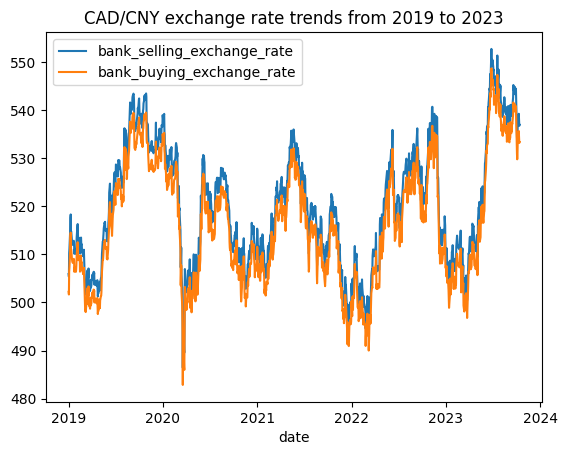

In [7]:
exchange_rates.plot(x='date', title="CAD/CNY exchange rate trends from 2019 to 2023")

## To graphically compare the annual fluctuations in the bank selling exchange rate trends from 2019 to 2023. In order to observe the changes in exchange rates within each year, disregarding the influence of the year.

In [8]:
ind2019 = exchange_rates[exchange_rates['date']<datetime.date(2020, 1, 1)].index[-1]+1
ind2020 = exchange_rates[exchange_rates['date']<datetime.date(2021, 1, 1)].index[-1]+1
ind2021 = exchange_rates[exchange_rates['date']<datetime.date(2022, 1, 1)].index[-1]+1
ind2022 = exchange_rates[exchange_rates['date']<datetime.date(2023, 1, 1)].index[-1]+1
ind2023 = exchange_rates['date'].index[-1]+1
ind2019, ind2020, ind2021, ind2022, ind2023

(260, 522, 783, 1042, 1247)

<Axes: xlabel='date'>

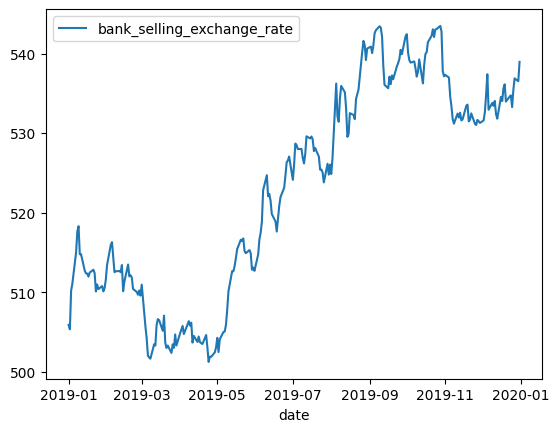

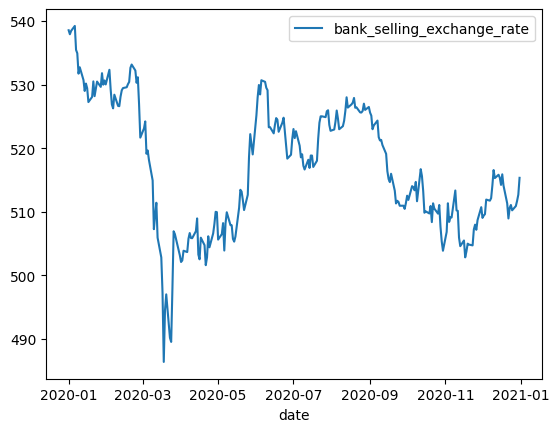

In [9]:
exchange_rates[:ind2019].plot(x='date', y='bank_selling_exchange_rate')
exchange_rates[ind2019:ind2020].plot(x='date', y='bank_selling_exchange_rate')

In [10]:
selling_2019 = exchange_rates['bank_selling_exchange_rate'][:ind2019]
datetime_unify_2019to2023_ls = []
for i in range(ind2019):
    datetime_unify_2019to2023_ls.append(datetime.datetime(
        year=2023, month=exchange_rates['date'][i].month, day=exchange_rates['date'][i].day
        )) 
month_day_2019 = pd.Series(datetime_unify_2019to2023_ls)
bank_selling_rate_2019 = pd.DataFrame({'bank_selling_rate_2019':selling_2019,
                                       'date_2023mmdd': month_day_2019})
# bank_selling_rate_2019.set_index(['date_2023mmdd'], inplace=True)
bank_selling_rate_2019

,bank_selling_rate_2019,date_2023mmdd
0,505.91,2023-01-01
1,505.35,2023-01-02
2,510.20,2023-01-03
3,511.09,2023-01-04
4,515.00,2023-01-07
...,...,...
255,533.27,2023-12-25
256,535.43,2023-12-26
257,536.88,2023-12-27
258,536.52,2023-12-30


In [11]:
bank_selling_rate_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   bank_selling_rate_2019  260 non-null    float64       
 1   date_2023mmdd           260 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


In [12]:
selling_2020 = exchange_rates['bank_selling_exchange_rate'][ind2019:ind2020]
datetime_unify_2020to2023_ls = []
for i in range(ind2019, ind2020):
    datetime_unify_2020to2023_ls.append(datetime.datetime(
        year=2023, month=exchange_rates['date'][i].month, day=exchange_rates['date'][i].day
        )) 
month_day_2020 = pd.Series(datetime_unify_2020to2023_ls, index=[i for i in range(ind2019,ind2020)])
bank_selling_rate_2020 = pd.DataFrame({'bank_selling_rate_2020':selling_2020,
                                       'date_2023mmdd': month_day_2020})
# bank_selling_rate_2020.set_index(['date_2023mmdd'], inplace=True)
bank_selling_rate_2020

,bank_selling_rate_2020,date_2023mmdd
260,538.54,2023-01-01
261,537.91,2023-01-02
262,538.44,2023-01-03
263,539.22,2023-01-06
264,535.45,2023-01-07
...,...,...
517,510.23,2023-12-25
518,510.90,2023-12-28
519,511.71,2023-12-29
520,512.69,2023-12-30


In [13]:
selling_2021 = exchange_rates['bank_selling_exchange_rate'][ind2020:ind2021]
datetime_unify_2021to2023_ls = []
for i in range(ind2020, ind2021):
    datetime_unify_2021to2023_ls.append(datetime.datetime(
        year=2023, month=exchange_rates['date'][i].month, day=exchange_rates['date'][i].day
        )) 
month_day_2021 = pd.Series(datetime_unify_2021to2023_ls, index=[i for i in range(ind2020,ind2021)])
bank_selling_rate_2021 = pd.DataFrame({'bank_selling_rate_2021':selling_2021,
                                       'date_2023mmdd': month_day_2021})
# bank_selling_rate_2020.set_index(['date_2023mmdd'], inplace=True)
bank_selling_rate_2021

,bank_selling_rate_2021,date_2023mmdd
522,514.93,2023-01-01
523,509.69,2023-01-04
524,508.97,2023-01-05
525,511.65,2023-01-06
526,510.87,2023-01-07
...,...,...
778,500.08,2023-12-27
779,499.44,2023-12-28
780,499.13,2023-12-29
781,499.76,2023-12-30


In [14]:
date_merged_2020 = pd.merge(bank_selling_rate_2019, bank_selling_rate_2020)
date_merged_2021 = pd.merge(date_merged_2020, bank_selling_rate_2021)
date_merged_2021

,bank_selling_rate_2019,date_2023mmdd,bank_selling_rate_2020,bank_selling_rate_2021
0,505.91,2023-01-01,538.54,514.93
1,515.00,2023-01-07,535.45,510.87
2,517.63,2023-01-08,534.92,511.35
3,512.72,2023-01-14,529.00,513.42
4,512.38,2023-01-15,530.16,509.99
...,...,...,...,...
100,534.03,2023-12-17,515.89,498.53
101,534.59,2023-12-23,510.62,498.74
102,534.74,2023-12-24,511.07,498.94
103,536.52,2023-12-30,512.69,499.76


<Axes: xlabel='date_2023mmdd'>

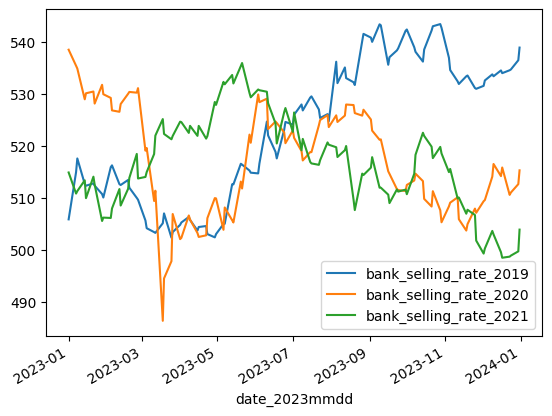

In [15]:
date_merged_2021.plot(x='date_2023mmdd')

In [16]:
selling_2022 = exchange_rates['bank_selling_exchange_rate'][ind2021:ind2022]
datetime_unify_2022to2023_ls = []
for i in range(ind2021, ind2022):
    datetime_unify_2022to2023_ls.append(datetime.datetime(
        year=2023, month=exchange_rates['date'][i].month, day=exchange_rates['date'][i].day
        )) 
month_day_2022 = pd.Series(datetime_unify_2022to2023_ls, index=[i for i in range(ind2021,ind2022)])
bank_selling_rate_2022 = pd.DataFrame({'bank_selling_rate_2022':selling_2022,
                                       'date_2023mmdd': month_day_2022})
bank_selling_rate_2022

,bank_selling_rate_2022,date_2023mmdd
783,500.81,2023-01-03
784,504.89,2023-01-04
785,503.22,2023-01-05
786,502.16,2023-01-06
787,505.05,2023-01-07
...,...,...
1037,514.90,2023-12-26
1038,517.92,2023-12-27
1039,517.11,2023-12-28
1040,516.03,2023-12-29


In [17]:
selling_2023 = exchange_rates['bank_selling_exchange_rate'][ind2022:]
datetime_unify_2023_ls = []
"""
for i in range(ind2022, ind2023):
    datetime_unify_2023_ls.append(datetime.datetime(
        year=2023, month=exchange_rates['date'][i].month, day=exchange_rates['date'][i].day
        )) 
"""
datetime_unify_2023_ls=[]
for i in range(ind2022, ind2023):
    datetime_unify_2023_ls.append(pd.Timestamp(exchange_rates['date'][i]))
    
month_day_2023 = pd.Series(datetime_unify_2023_ls, index=[i for i in range(ind2022,ind2023)])
bank_selling_rate_2023 = pd.DataFrame({'bank_selling_rate_2023':selling_2023,
                                       'date_2023mmdd': month_day_2023})
bank_selling_rate_2023

,bank_selling_rate_2023,date_2023mmdd
1042,511.20,2023-01-02
1043,509.10,2023-01-03
1044,511.27,2023-01-04
1045,509.06,2023-01-05
1046,507.79,2023-01-06
...,...,...
1242,537.40,2023-10-09
1243,539.24,2023-10-10
1244,538.02,2023-10-11
1245,536.74,2023-10-12


In [18]:
date_merged_2023_left = pd.merge(bank_selling_rate_2022, bank_selling_rate_2023, how='left')
date_merged_2023_left

,bank_selling_rate_2022,date_2023mmdd,bank_selling_rate_2023
0,500.81,2023-01-03,509.10
1,504.89,2023-01-04,511.27
2,503.22,2023-01-05,509.06
3,502.16,2023-01-06,507.79
4,505.05,2023-01-07,NaN
...,...,...,...
254,514.90,2023-12-26,NaN
255,517.92,2023-12-27,NaN
256,517.11,2023-12-28,NaN
257,516.03,2023-12-29,NaN


<Axes: xlabel='date_2023mmdd'>

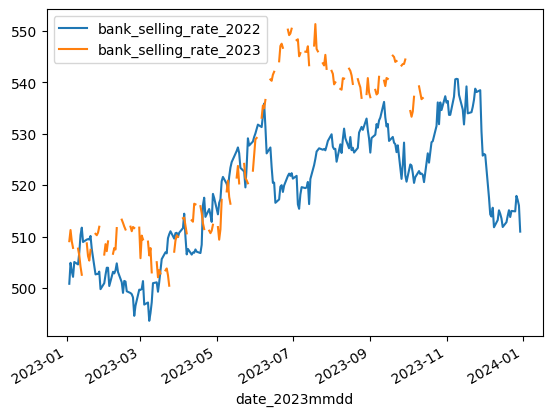

In [19]:
date_merged_2023_left.plot(x='date_2023mmdd')

In [20]:
date_merged_2023_right = pd.merge(bank_selling_rate_2022, bank_selling_rate_2023, how='right')
date_merged_2023_right

,bank_selling_rate_2022,date_2023mmdd,bank_selling_rate_2023
0,NaN,2023-01-02,511.20
1,500.81,2023-01-03,509.10
2,504.89,2023-01-04,511.27
3,503.22,2023-01-05,509.06
4,502.16,2023-01-06,507.79
...,...,...,...
200,NaN,2023-10-09,537.40
201,522.75,2023-10-10,539.24
202,522.18,2023-10-11,538.02
203,522.27,2023-10-12,536.74


<Axes: xlabel='date_2023mmdd'>

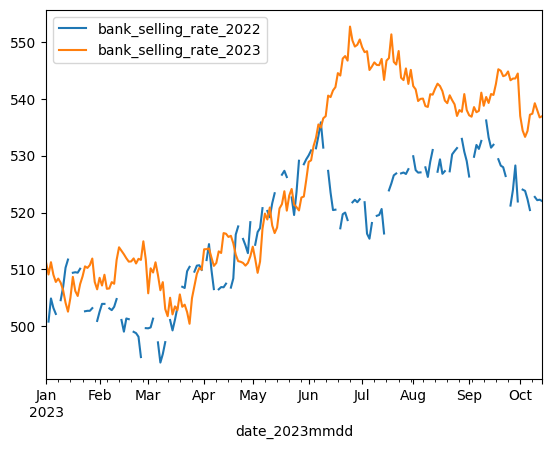

In [21]:
date_merged_2023_right.plot(x='date_2023mmdd')

<Axes: xlabel='date_2023mmdd'>

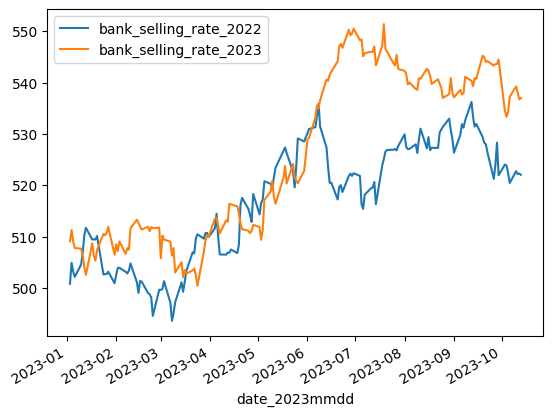

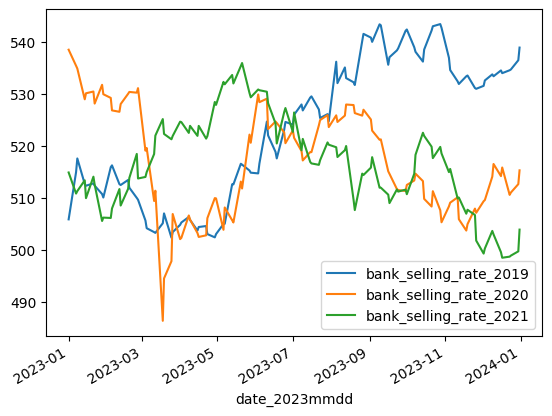

In [22]:
date_merged_2023 = pd.merge(bank_selling_rate_2022, bank_selling_rate_2023)
date_merged_2023.plot(x='date_2023mmdd')
date_merged_2021.plot(x='date_2023mmdd')

<Axes: xlabel='date_2023mmdd'>

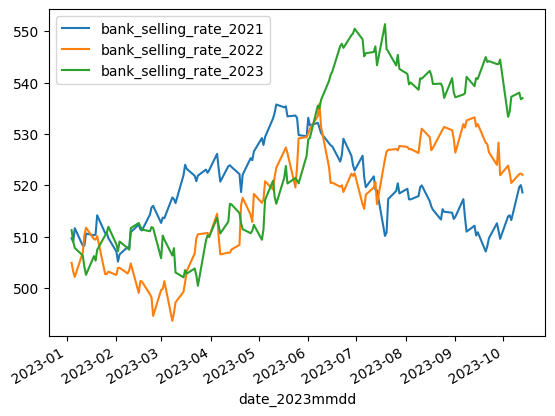

In [23]:
date_merge = pd.merge(bank_selling_rate_2021, date_merged_2023)
date_merge.plot(x='date_2023mmdd')

## Although I haven't seen very obvious trend in these roughly first plot graphs, It seems that during a certain period around June, the exchange rate stabilizes around 530.

# Discussion of statistics to examine in detail

1. Find the maximum and minimum of bank selling exchange rate and of bank buying exchange rate each year, and find the largest price difference each year.Then find the average or the median of the exchange rates each year. After that, compare the difference between years.

1. Make Table 1: To make things simplier, I plan to creat a 5 row, 12 colunmn table. Each row is a year(2019, 2020, 2021, 2022, 2023), Each colum is a month( 1, 2, ...12), and in each cell should be the average or the median of bank selling exchange rate(monthly average/median).

1. Make Table 2: Using same table structure as table 1, but each cell is the average or the median of bank buying exchange rate.

1. Use Table 1, find the maximum and minimum of bank selling exchange rate(monthly average/median) and of bank buying exchange rate(monthly average/median) each month (across the span of all the years).Then find the average or the median of the exchange rates each month (across the span of all the years). After that, compare the difference between months.

1. Plot Table 1 or the tranpose of Table 1: the x-axis should be each month, y-axis should be the bank selling exchange rate, lenge is each year and the median/average/minimum/maximum find from previous step(step 4).

1. If it works well, aslo do it for Table 2 (repeat step 4, 5 for table 2).

1. Find largest price difference(difference between bank selling and buying rate) of monthly average/median in each year. According these price difference, if we just invest once a year(don't consider the compound interest), what is the maximum profit we can gain, and how much can we potentially lose. Whether it is possible to make profit from this kind of investment.

1. If any of the steps is logically wrong or I couldn't achieve it technically, I will give it up and just calculate some averages or medians and find maximum or minimum exchange rates in months or years.

### Original statistics I intend to examin: (give up already)

1. Roughly forecast the exchange rate of this year(2023) based on the exchange rate trend of previous years(2019-2022). Because Saturday and Sunday are not forex trading days, when I merge data from the dataframe of different years, it will loss many precious data. I should do interpolation to calsulate the exchange rates for Saturday and Sunday and include all days in commmon year. This would improve my plots, and may find more exact rules.
1. Find the best time to buy Canadian dollars each year(the minimum bank selling exchange rate), find the relations with that perticular day between every year.
1. In the past 5 years(including this year) for a certain amount of start-up money, what is the maximum profit we can gain, and how much we can lose if we invest at least once and at most fifth in these five years(considering compound interest).
1. What about investment at most once a month?
1. After ploting the graphs above, I realized it's not easy to do what I think. My low-skill in pandas and lack of statistics knowledge won't allow me do them, and I decided to give up on these. It is unwise to do such things in very unprofessional way. I will also give up on others I mentioned in Disscusion if I could be forewarned that they are impossible.